In [37]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns

In [38]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [43]:
dataset=pd.read_csv("/content/gdrive/MyDrive/Seed_Data_1.csv")
dataset.shape

(210, 8)

In [44]:
dataset.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [45]:
#cheacking for null values
dataset.isnull().sum()

A          0
P          0
C          0
LK         0
WK         0
A_Coef     0
LKG       21
target     0
dtype: int64

In [47]:
dataset.LKG.replace([np.nan], dataset.LKG.mean(), inplace=True);
dataset

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220000,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956000,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825000,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805000,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175000,0
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870000,2
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003000,2
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056000,2
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044000,2


In [48]:
#cheacking for null values
dataset.isnull().sum()

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64

In [50]:
x = dataset.iloc[:, [1,2, 3, 4, 5, 6]].values

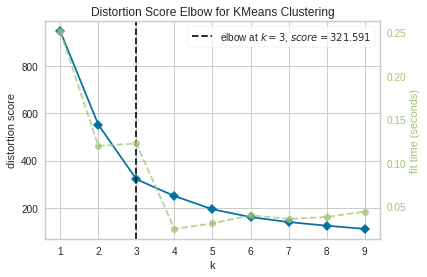

In [51]:
target = dataset.iloc[:, -1]
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(x)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)

y_kmeans = kmeans.fit_predict(x)

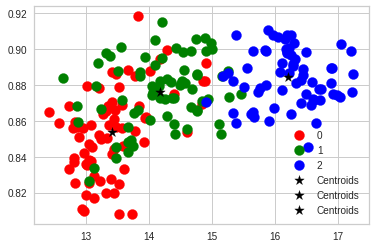

In [56]:
#s=size of dots
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'green', label = '1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'blue', label = '2')
plt.scatter(kmeans.cluster_centers_[0][0], kmeans.cluster_centers_[0][1],marker='*', s = 100, c = 'black', label = 'Centroids')
plt.scatter(kmeans.cluster_centers_[1][0], kmeans.cluster_centers_[1][1],marker='*', s = 100, c = 'black', label = 'Centroids')
plt.scatter(kmeans.cluster_centers_[2][0], kmeans.cluster_centers_[2][1],marker='*', s = 100, c = 'black', label = 'Centroids')
plt.legend()

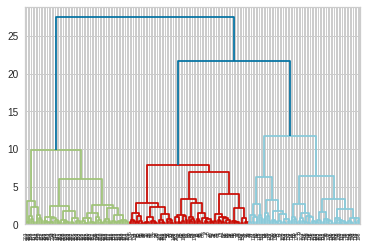

In [57]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))

In [59]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(x)

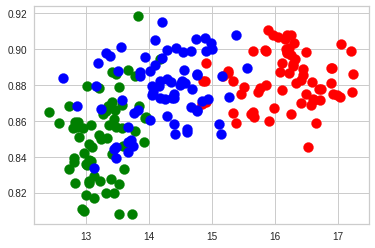

In [60]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = '0')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'green', label = '1')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'blue', label = '2')

In [ ]:
#In the code above we import the AgglomerativeClustering class from the "sklearn.cluster" library. The number of parameters is set to 2 using the n_clusters parameter while the affinity is set to "euclidean" (distance between the datapoints). Finally linkage parameter is set to "ward", which minimizes the variant between the clusters.